In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import scanpy.external as scex
import sklearn.metrics
import seaborn as sns
from matplotlib import pyplot as plt
import scanpyHelpers as scH
from collections import Counter

In [3]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.10.4 pynndescent==0.5.12


In [5]:
%matplotlib inline

In [6]:
writeDir = "write/"

fileName = "luadKim"

resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

In [8]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

In [21]:
adata = sc.read_h5ad(resultsFileQC)
adata

AnnData object with n_obs × n_vars = 30946 × 17415
    obs: 'sample', 'source', 'cell_type', 'subclone', 'complexity', 'smoking_status', 'disease_extent', 'AJCC_stage', 'genetic_hormonal_features', 'grade', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [23]:
adata = adata[adata.obs.cell_type=="Malignant"]
adata = adata[np.logical_not(adata.obs.disease_extent=="metastatic")]
adata

View of AnnData object with n_obs × n_vars = 4546 × 17415
    obs: 'sample', 'source', 'cell_type', 'subclone', 'complexity', 'smoking_status', 'disease_extent', 'AJCC_stage', 'genetic_hormonal_features', 'grade', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [24]:
Counter(adata.obs["sample"])

Counter({'P0034': 1920,
         'P0018': 768,
         'P0028': 677,
         'P0030': 514,
         'P0020': 249,
         'P0019': 158,
         'P0025': 104,
         'P0006': 71,
         'P0031': 63,
         'P0008': 22})

In [25]:
adata.obs["genetic_hormonal_features"]

cell_name
AAACCTGAGCTAAACA_LUNG_T34          EGFR WT
AAACCTGCAAGCTGAG_LUNG_T34          EGFR WT
AAACCTGCAGGACGTA_LUNG_T31          EGFR WT
AAACCTGCATCTCCCA_LUNG_T19    EGFR Exon 20 
AAACCTGCATGCCTAA_LUNG_T20          EGFR WT
                                 ...      
TTTGTCAGTCTAACGT_LUNG_T30       EGFR del19
TTTGTCAGTTTGTGTG_LUNG_T30       EGFR del19
TTTGTCATCAGGCAAG_LUNG_T34          EGFR WT
TTTGTCATCCAAAGTC_LUNG_T30       EGFR del19
TTTGTCATCTTGCCGT_LUNG_T30       EGFR del19
Name: genetic_hormonal_features, Length: 4546, dtype: category
Categories (4, object): ['EGFR Exon 20 ', 'EGFR WT', 'EGFR del19', 'L858R']

In [26]:
adata.obs["sample"].cat.categories

Index(['P0006', 'P0008', 'P0018', 'P0019', 'P0020', 'P0025', 'P0028', 'P0030',
       'P0031', 'P0034'],
      dtype='object')

In [29]:
patient = ['P0030', 'P0034']
#adata = adata[adata.obs["sample"]== patient]
adata = adata[[p in patient for p in adata.obs["sample"]],]

#resultsFile = writeDir + fileName + patient+ '.h5ad'  
#adata.layers["counts"] = adata.X.copy()
adata

View of AnnData object with n_obs × n_vars = 2434 × 17415
    obs: 'sample', 'source', 'cell_type', 'subclone', 'complexity', 'smoking_status', 'disease_extent', 'AJCC_stage', 'genetic_hormonal_features', 'grade', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [30]:
adata.obs

,sample,source,cell_type,subclone,complexity,smoking_status,disease_extent,AJCC_stage,genetic_hormonal_features,grade,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt
cell_name,,,,,,,,,,,,,,,,,,,
AAACCTGAGCTAAACA_LUNG_T34,P0034,tLung,Malignant,1,2530,never,NaN,IA3,EGFR WT,MD,2530,2529,9824.0,40.635179,55.333876,64.393322,75.264658,0.0,0.0
AAACCTGCAAGCTGAG_LUNG_T34,P0034,tLung,Malignant,1,2502,never,NaN,IA3,EGFR WT,MD,2502,2501,9105.0,35.310269,50.411862,61.306974,73.399231,0.0,0.0
AAACCTGGTCACCCAG_LUNG_T34,P0034,tLung,Malignant,1,3559,never,NaN,IA3,EGFR WT,MD,3559,3558,14351.0,30.834088,43.906348,55.027524,68.413351,0.0,0.0
AAACCTGGTGGAAAGA_LUNG_T34,P0034,tLung,Malignant,4,1900,never,NaN,IA3,EGFR WT,MD,1900,1899,5350.0,32.093458,43.233645,54.915888,70.485981,0.0,0.0
AAACCTGTCTGATTCT_LUNG_T34,P0034,tLung,Malignant,1,2167,never,NaN,IA3,EGFR WT,MD,2167,2166,5860.0,26.945392,38.771331,51.740614,67.645051,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCTAACGT_LUNG_T30,P0030,tLung,Malignant,1,1542,never,NaN,IA,EGFR del19,NaN,1542,1540,3637.0,30.519659,42.645037,54.467968,71.405004,0.0,0.0
TTTGTCAGTTTGTGTG_LUNG_T30,P0030,tLung,Malignant,1,2606,never,NaN,IA,EGFR del19,NaN,2606,2605,9020.0,34.334812,46.075388,57.150776,70.687361,0.0,0.0
TTTGTCATCAGGCAAG_LUNG_T34,P0034,tLung,Malignant,1,2881,never,NaN,IA3,EGFR WT,MD,2881,2880,11551.0,40.645832,54.835079,63.258592,73.681932,0.0,0.0


In [31]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [32]:
sc.pp.log1p(adata)

In [99]:
#adata.write(writeDir + fileName + patient+ '_QC.h5ad')

In [33]:
sc.pp.highly_variable_genes(adata)#, flavor = "seurat", n_top_genes=2000)

extracting highly variable genes


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


2006


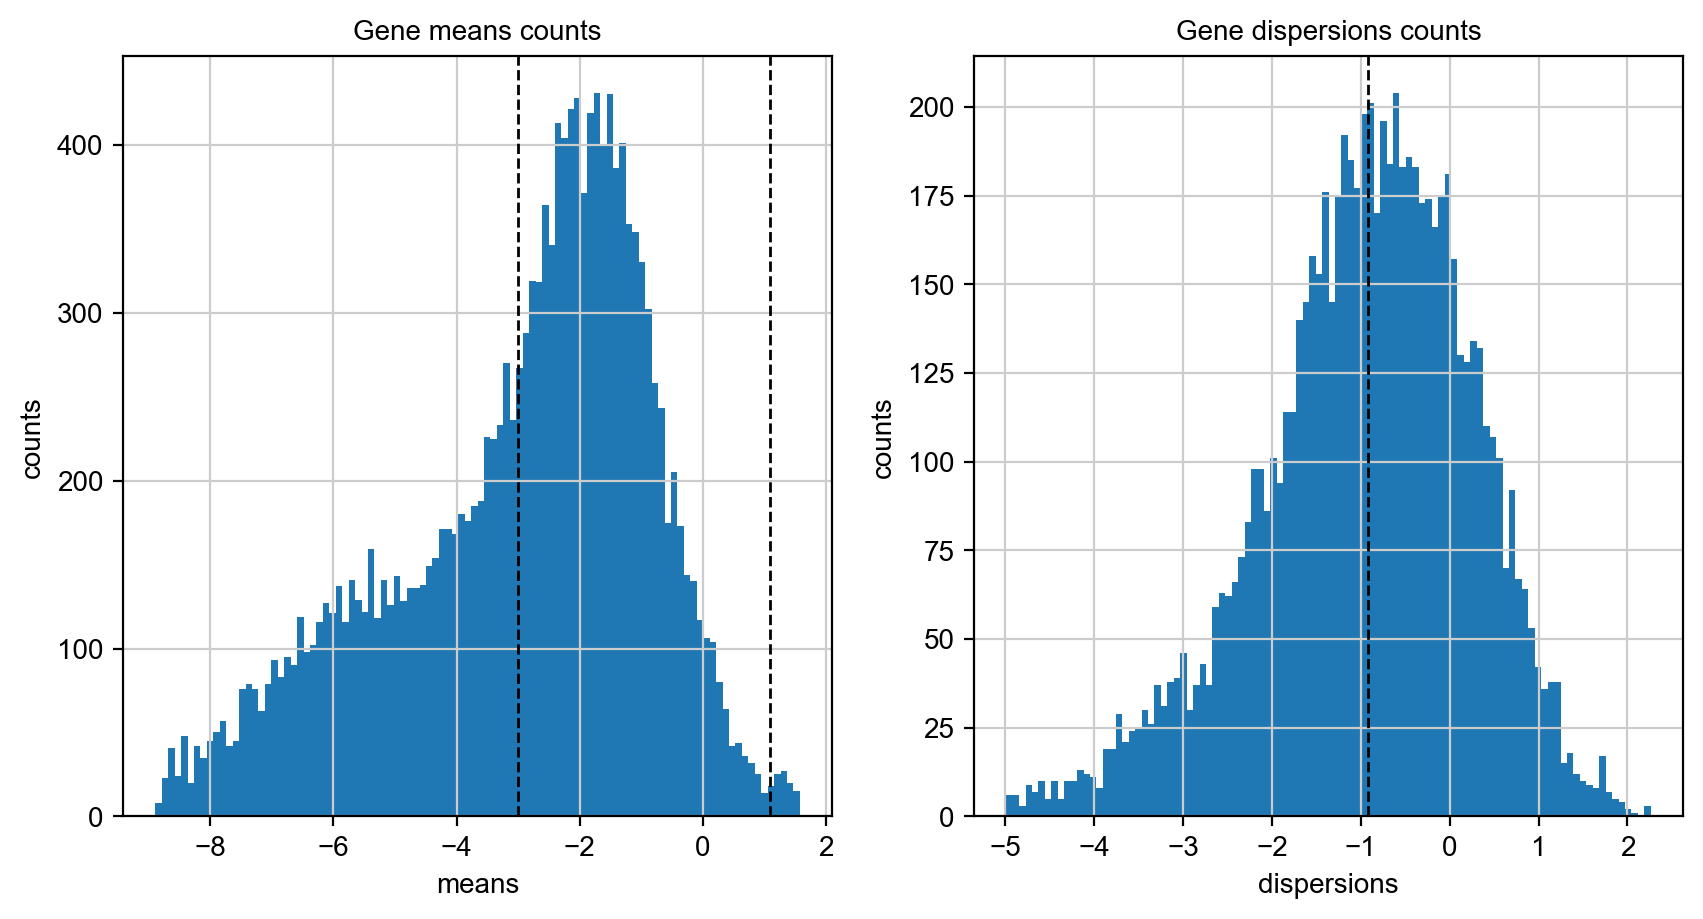

In [35]:
minMean = 0.05
maxMean = 3
minDisp = 0.4

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

means = adata.var[["means"]][adata.var[["means"]] > np.exp(-14)]#adata.var[["means"]],
axs[0].hist(np.log(means), bins=100)#, log=True),
axs[0].axvline(np.log(minMean), color='k', linestyle='dashed', linewidth=1)
axs[0].axvline(np.log(maxMean), color='k', linestyle='dashed', linewidth=1)
axs[0].set_title('Gene means counts')
axs[0].set_xlabel('means')
axs[0].set_ylabel('counts')

dispNorm = adata.var[["dispersions_norm"]][adata.var[["dispersions_norm"]] > np.exp(-5)]#adata.var[["means"]],
axs[1].hist(np.log(dispNorm), bins=100)#, log=True),
axs[1].axvline(np.log(minDisp), color='k', linestyle='dashed', linewidth=1)
axs[1].set_title('Gene dispersions counts')
axs[1].set_xlabel('dispersions')
axs[1].set_ylabel('counts')

sc.pp.highly_variable_genes(adata, min_disp=minDisp, min_mean=minMean, max_mean=maxMean)
print(sum(adata.var.highly_variable))

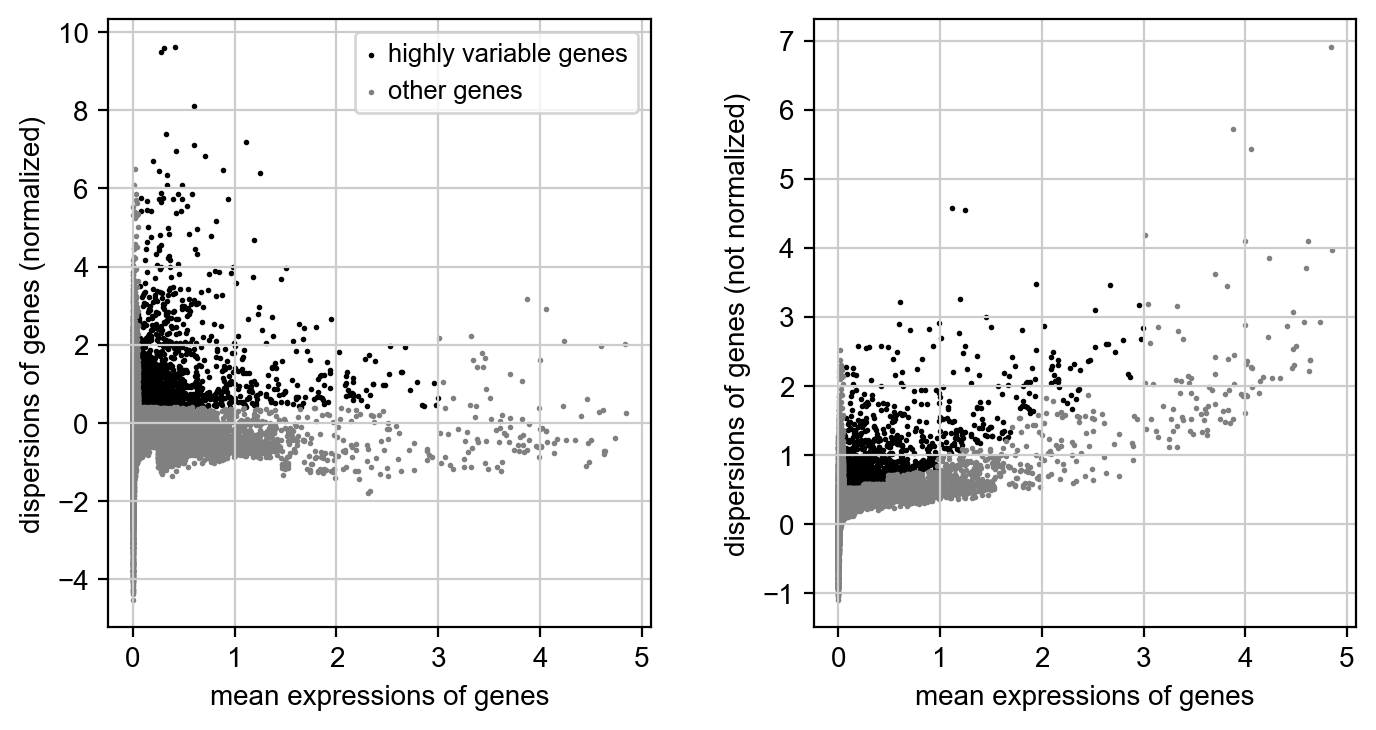

In [36]:
sc.pl.highly_variable_genes(adata)

In [37]:
#for inGene in adata.var[-8:].index.tolist():
#    adata.var.loc[inGene,"highly_variable"] = False

In [38]:
adata.raw = adata

In [39]:
#adata = adata[:, adata.var.highly_variable]
adata = adata[:, np.logical_and(adata.var.highly_variable, np.logical_not(adata.var.mt))]

In [40]:
#sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [41]:
#sc.pp.scale(adata, max_value=10)

In [42]:
sc.tl.pca(adata, n_comps = 100, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:01)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


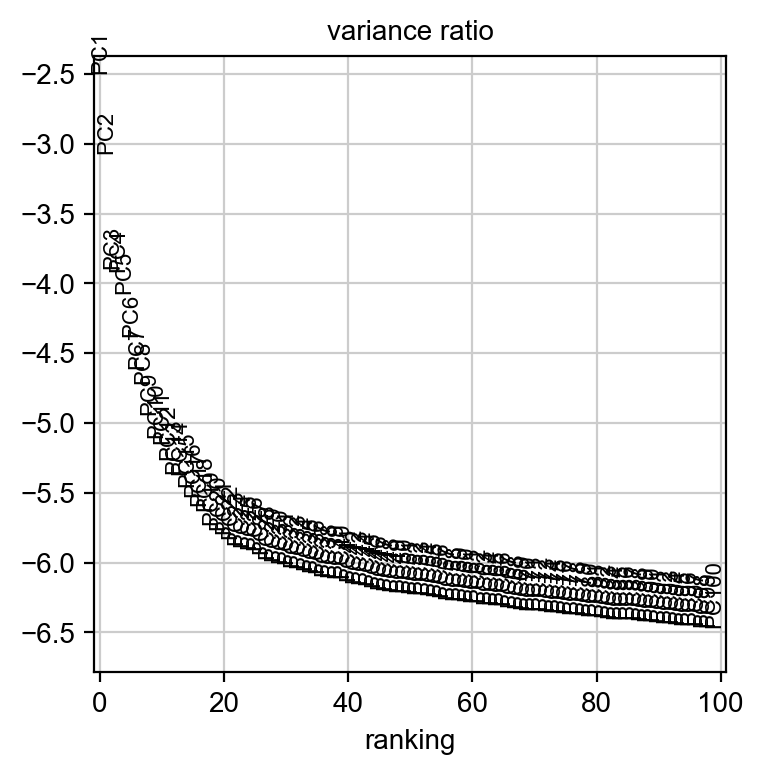

In [43]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100, log=True)

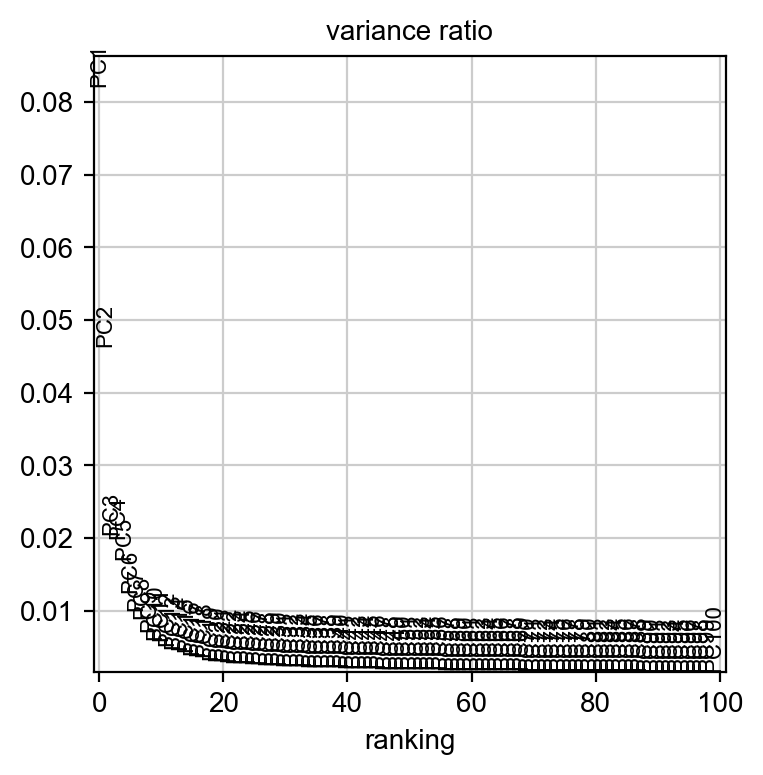

In [44]:
sc.pl.pca_variance_ratio(adata, n_pcs = 100)

In [45]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=60)

computing neighbors
    using 'X_pca' with n_pcs = 60
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [46]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


In [47]:
sc.tl.leiden(adata, resolution=0.5)

running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

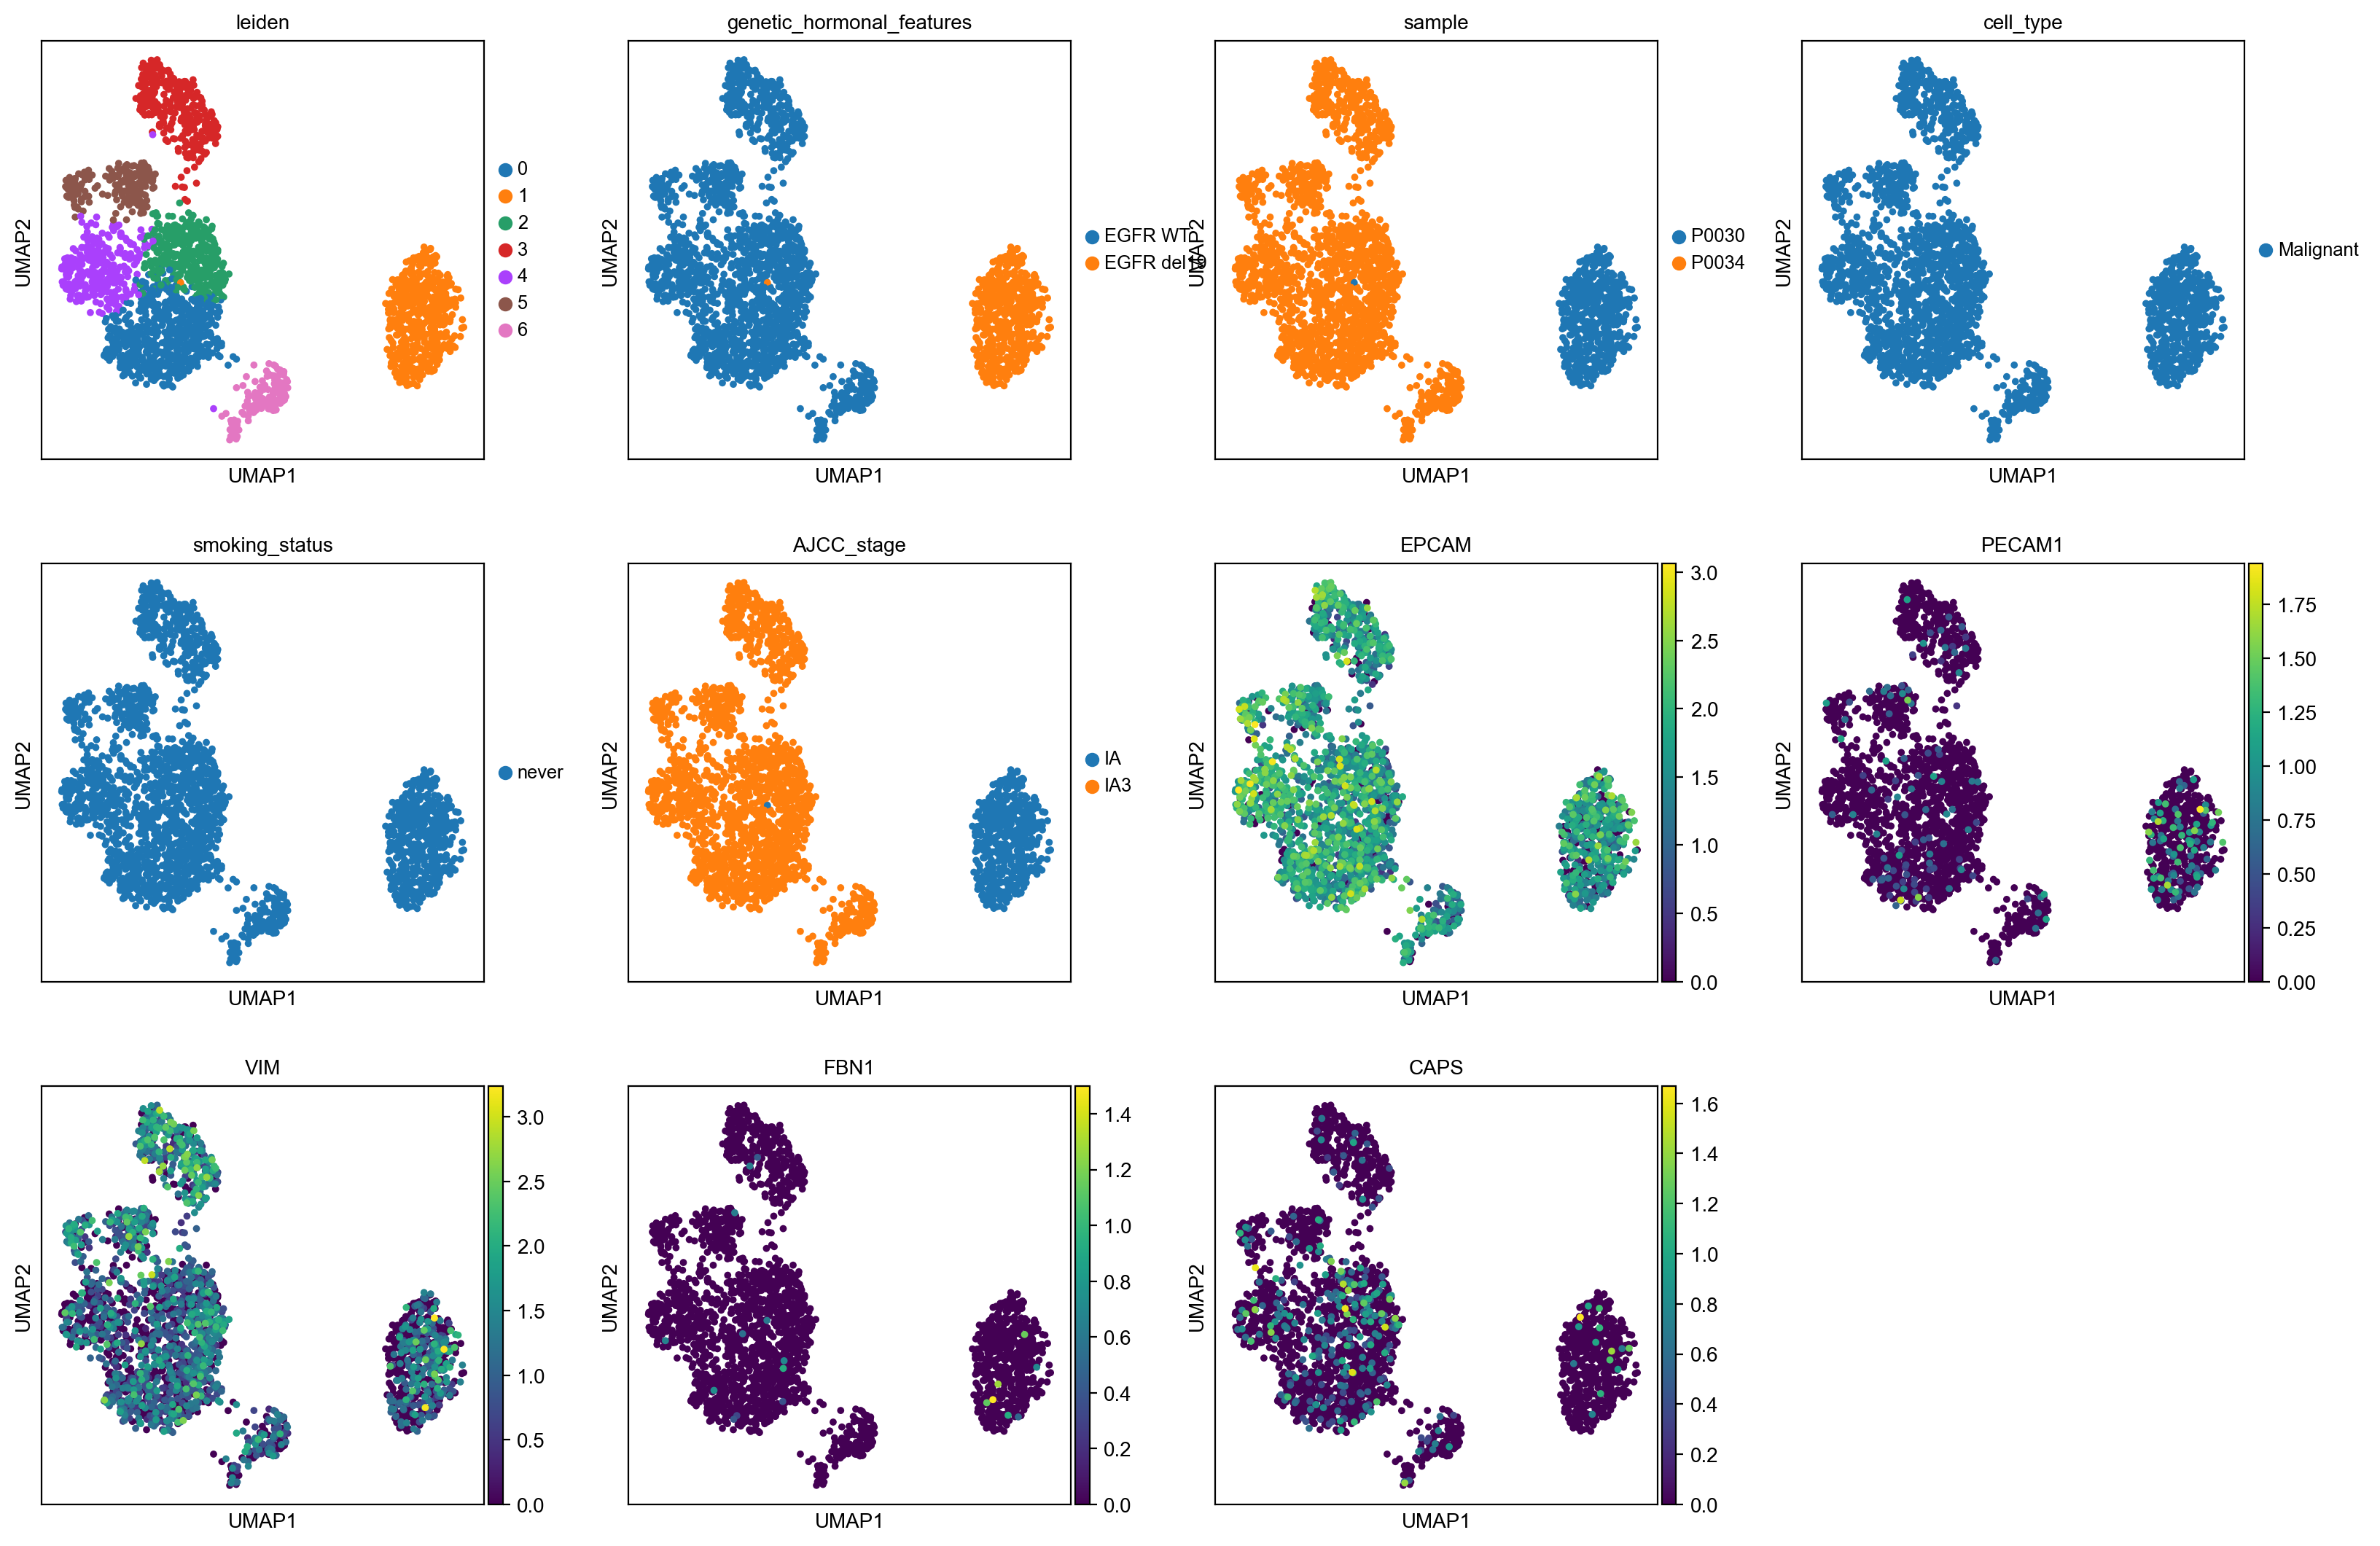

In [49]:
sc.pl.umap(adata, color=["leiden","genetic_hormonal_features","sample","cell_type","smoking_status","AJCC_stage","EPCAM","PECAM1","VIM","FBN1","CAPS"],ncols=4)

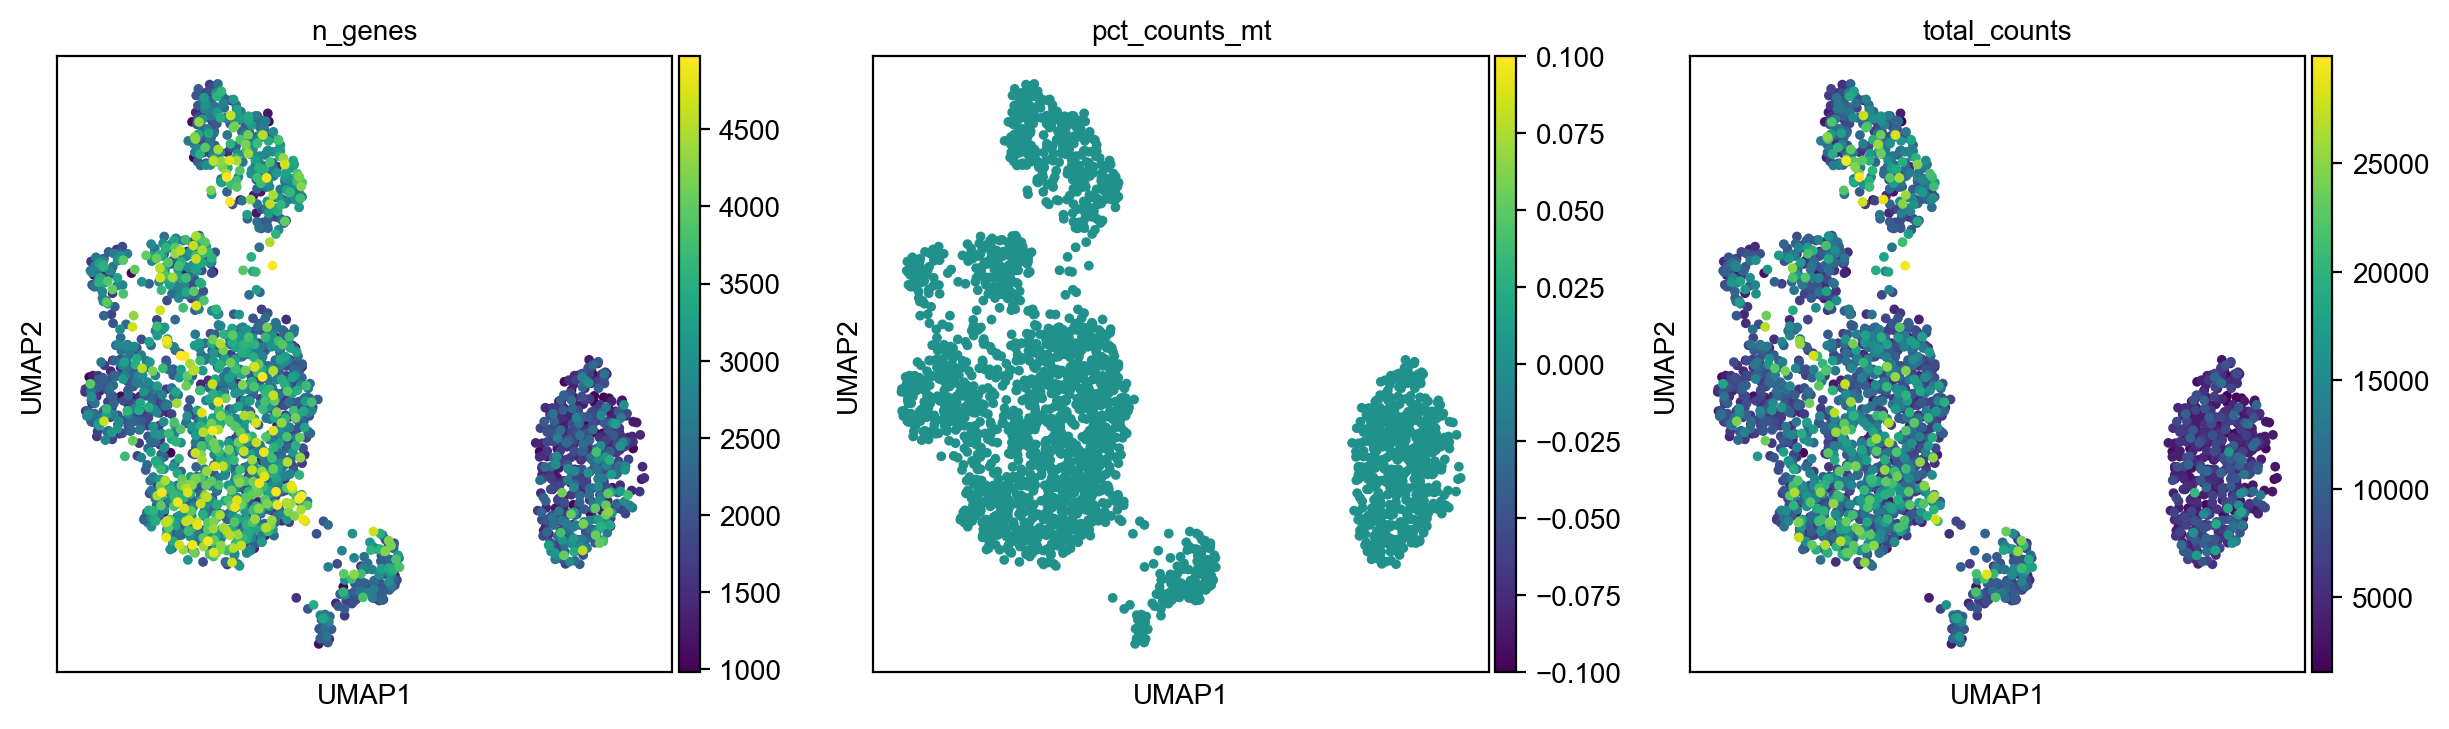

In [50]:
sc.pl.umap(adata, color=["n_genes","pct_counts_mt","total_counts"])

In [117]:
#adata.uns['log1p']['base']=None

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


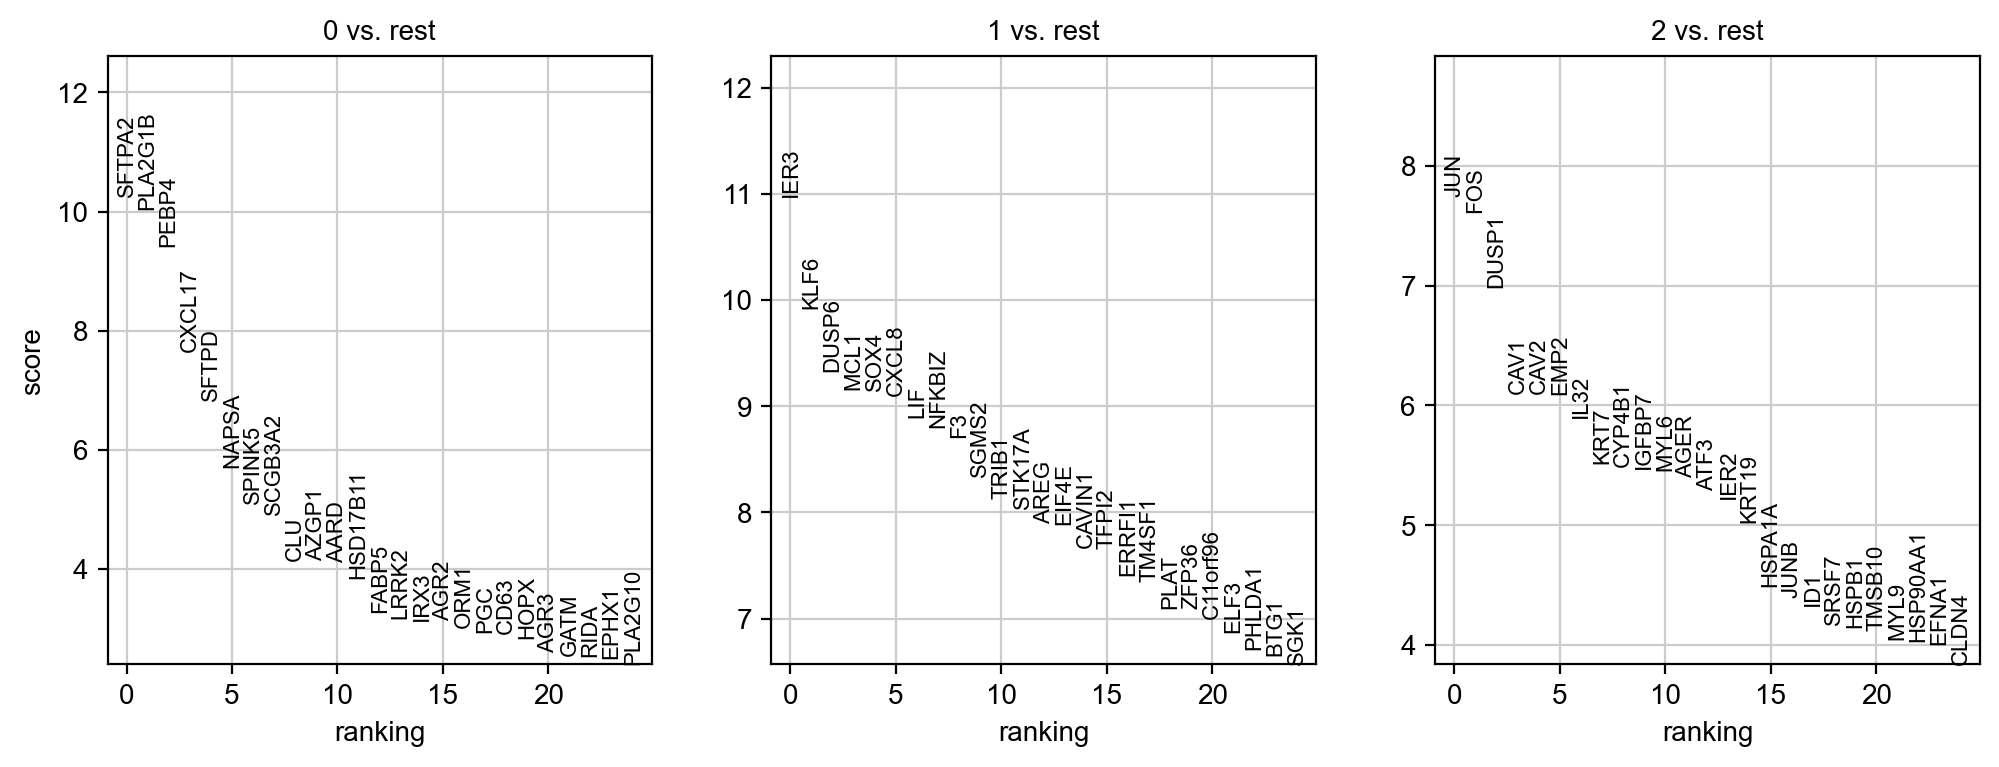

In [118]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw=False)
#sc.tl.filter_rank_genes_groups(adata, groupby="leiden", use_raw=False,
#                                   key_added='rank_genes_groups_filtered', 
#                                   min_in_group_fraction=0.25, min_fold_change=1, max_out_group_fraction=0.5, compare_abs=False)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [119]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

,0,1,2
0,SFTPA2,IER3,JUN
1,PLA2G1B,KLF6,FOS
2,PEBP4,DUSP6,DUSP1
3,CXCL17,MCL1,CAV1
4,SFTPD,SOX4,CAV2
5,NAPSA,CXCL8,EMP2
6,SPINK5,LIF,IL32
7,SCGB3A2,NFKBIZ,KRT7
8,CLU,F3,CYP4B1
9,AZGP1,SGMS2,IGFBP7


    using 'X_pca' with n_pcs = 60
Storing dendrogram info using `.uns['dendrogram_leiden']`


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/get/get.py:66: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What

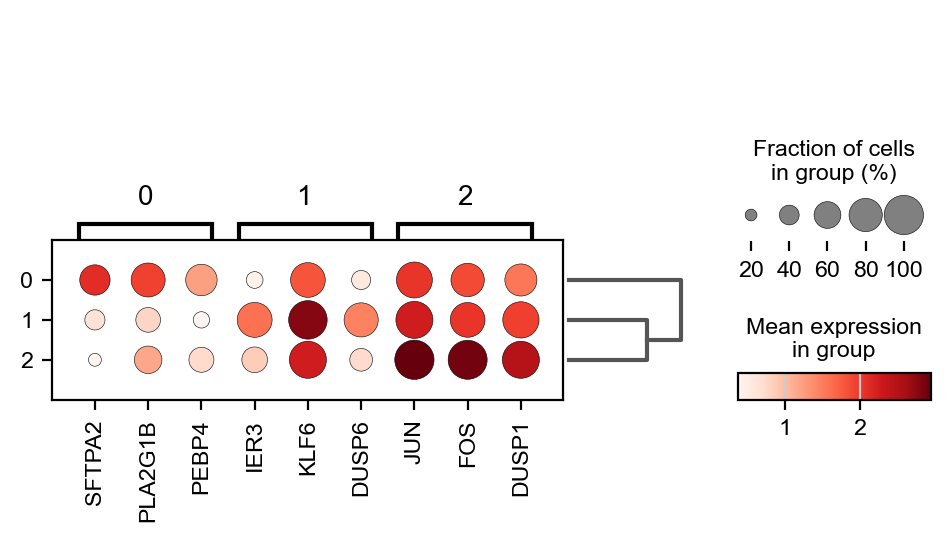

In [120]:
sc.tl.dendrogram(adata,groupby="leiden", n_pcs=60)
sc.pl.rank_genes_groups_dotplot(adata,n_genes=3)#,key="rank_genes_groups_filtered")

In [51]:
resultsFile

'write/luadKim.h5ad'

In [52]:
adata

AnnData object with n_obs × n_vars = 2434 × 2006
    obs: 'sample', 'source', 'cell_type', 'subclone', 'complexity', 'smoking_status', 'disease_extent', 'AJCC_stage', 'genetic_hormonal_features', 'grade', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'genetic_hormonal_features_colors', 'sample_colors', 'cell_type_colors', 'smoking_status_colors', 'AJCC_stage_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [53]:
#adata.write(resultsFile)
adata.write('write/luadKimP30P34.h5ad')
adata

AnnData object with n_obs × n_vars = 2434 × 2006
    obs: 'sample', 'source', 'cell_type', 'subclone', 'complexity', 'smoking_status', 'disease_extent', 'AJCC_stage', 'genetic_hormonal_features', 'grade', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'genetic_hormonal_features_colors', 'sample_colors', 'cell_type_colors', 'smoking_status_colors', 'AJCC_stage_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'